Вычислить минимум функции F(x) = P(x_1 )*x^2-2.5P(x_2 )  sin⁡(x)-3 на отрезке [a, b] с точностью ε.  
P(x_1), P(x_2) — значения в точках x_1, x_2 соответственно интерполяционного многочлена, построенного 
для таблично заданной функции f(x).  
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  
y = [1.859, 1.852, 1.851, 1.848, 1.842, 1.833, 1.822]  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# x, y — массив точек (x,y), 
# t — точка, в которой требуется вычислить значение интерполяционного многочлена
def lagranz(x, y, t): 
    ans = 0 
    for j in range(len(y)): 
        nom = 1; 
        denom = 1 
        for i in range(len(y)): 
            if i != j:  
                nom = nom*(t - x[i]) 
                denom = denom*(x[j] - x[i]) 
        ans = ans + y[j] * nom / denom 
    return ans 


    
# f — функция, минимум которой хотим найти.
# l, r — границы отрезка, на котором ищем минимум.
# eps — заданная точность.
#Вариант, при котором функция на каждой итерации вычисляется только один раз.
def GoldenSectionSearch(f, l, r, eps):
    phi = (1 + 5 ** 0.5) / 2
    resphi = 2 - phi
    x1, x2 = l + resphi * (r - l), r - resphi * (r - l)       
    f1, f2 = f(x1), f(x2)
    num_of_iter = 0
    while abs(r - l) > eps:
        num_of_iter += 1
        if f1 < f2:
            r, x2, f2 = x2, x1, f1
            x1 = l + resphi * (r - l)
            f1 = f(x1) 
        else:
            l, x1, f1 = x1, x2, f2
            x2 = r - resphi * (r - l)
            f2 = f(x2)
    print("Количество итераций:", num_of_iter)
    x_ans = (x1 + x2) / 2
    y_ans = f(x_ans)
    return (x_ans, y_ans)

P_x1 = 1.8542129570853714     P_x2 = 1.8232784724344842


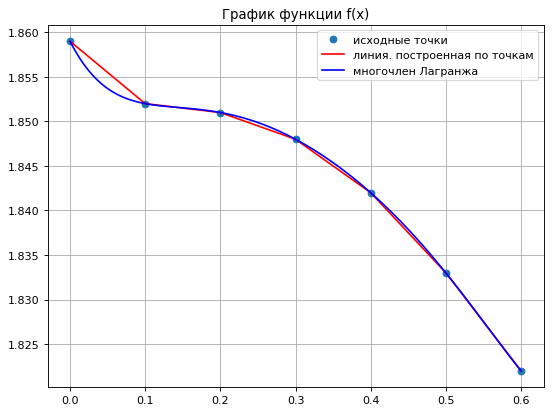

Количество итераций: 21
Минимум функции: (0.8297606112070215, -5.086268874417563)


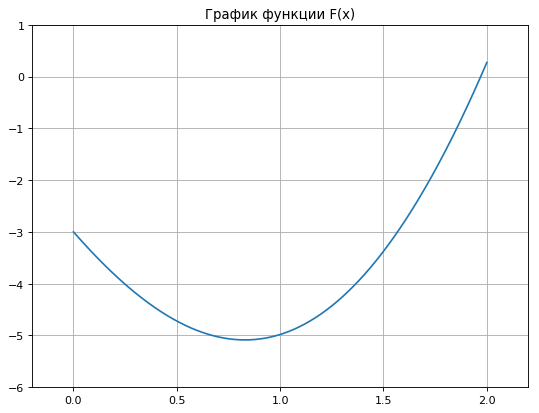

In [9]:
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
y = np.array([1.859, 1.852, 1.851, 1.848, 1.842, 1.833, 1.822])

x1, x2 = 0.042, 0.588
a, b = 0, 2
eps = 0.0001

P_x1, P_x2 = lagranz(x, f_x, x1), lagranz(x, f_x, x2)
print('P_x1 =', P_x1, "   ", 'P_x2 =', P_x2)

x_arr = np.linspace(0, 0.6, 1000) 
y_lagr = [lagranz(x, f_x, i) for i in xnew]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', x, y, 'r', x_arr, y_lagr, 'b') 
plt.grid(True)
plt.title("График функции f(x)")
plt.legend(("исходные точки", "линия. построенная по точкам", "многочлен Лагранжа"))
plt.show()

 
def f(x):
    return P_x1 * x ** 2 -2.5 * P_x2 * math.sin(x) - 3

minimum = GoldenSectionSearch(f, a, b, eps)
print("Минимум функции:", minimum)

xx = np.linspace(0, 2, 1000) 
yy = [f(x) for x in xx]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xx, yy) 
plt.grid(True)
plt.xlim(-0.2, 2.2)
plt.ylim(-6, 1)
plt.title("График функции F(x)")
plt.show()
